### Load the Essential Libraries that would be used over the cause of the project

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the Training dataset into Jupyter Notebook

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

# The Training samples are 50,000 images, each sample is a 32 x 32 image and the 3 stands for the RGB channels

(50000, 32, 32, 3)

### Load the Testing dataset into Jupyter Notebook

In [4]:
X_test.shape

# The Testing samples are 10,000 images, each sample is a 32 x 32 image and the 3 stands for the RGB channels

(10000, 32, 32, 3)

So we basically have 60,000 images in total, 50,000 are for Training and 10,000 for Testing

In [6]:
y_train.shape

# There are 50,000 samples in a 1 dimesional array

(50000, 1)

In [7]:
y_train[:5]

# We want to check the first 5 samples

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2 dimesional array, for our classification having 1 dimesional array is good enough. so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,) # This is to reshape our y_train without modifying our first dimension which is 10,000
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

The below code is to let us know what image each index represnts in our dataset

In [34]:
print((classes[0],), 
      (classes[1],), 
      (classes[2],), 
      (classes[3],), 
      (classes[4],), 
      (classes[5],), 
      (classes[6],), 
      (classes[7],),
      (classes[8],), 
      (classes[9],)
      , sep='\n') 

('airplane',)
('automobile',)
('bird',)
('cat',)
('deer',)
('dog',)
('frog',)
('horse',)
('ship',)
('truck',)


This code below defines a function plot_sample that is used to display a single image and its corresponding label from our dataset.

The function takes in 3 arguments; 

- X: A numpy array containing the images in the dataset.
- y: A numpy array containing the labels corresponding to each image in X
- index: An integer representing the index of the image to be displayed

The function uses matplotlib library to create a figure with a size of 15 by 2. It then displays the image with the specified index using the imshow function. The xlabel function is used to set the label of the x-axis to the corresponding class name using the classes dictionary, where y[index] is the label of the image at the specified index, and classes is a dictionary that maps the label to the class nam

In [35]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

The code below calls the plot_sample function with three arguments: X_train, y_train, and 0. 
The output of the code will be a figure that displays the first image in the training set (X_train[0]) along with its corresponding label (y_train[0]), using the plot_sample function. The figure will have a size of 15 by 2 and will show the image with its corresponding label as the x-axis label.

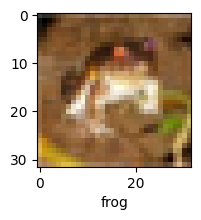

In [37]:
plot_sample(X_train, y_train, 0)

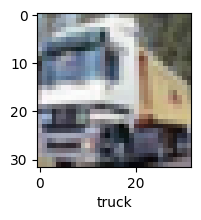

In [38]:
plot_sample(X_train, y_train, 1)

### Normalizing the Training data

We need to normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0 --> 1 range, we need to divide it by 255

In [39]:
X_train = X_train / 255
X_test = X_test / 255

### Build simple artificial neural network for image classification

In [40]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # This is the first layer which accepts the shape of 32 x 32 by 3
        layers.Dense(3000, activation='relu'), # This is a deep layer containing 3000 neurons
        layers.Dense(1000, activation='relu'), # This is another deep layer containing 1000 neurons
        layers.Dense(10, activation='softmax') # This has 10 categories (because there are 10 categories of images in our dataset)
    ])

ann.compile(optimizer='SGD', # This argument specifies the optimization algorithm to be used during training. In this case, the Stochastic Gradient Descent (SGD) optimizer is selected. The optimizer is responsible for updating the weights of the neural network during training in order to minimize the loss function.
              loss='sparse_categorical_crossentropy', # This argument specifies the loss function to be used during training. In this case, the Sparse Categorical Cross-Entropy loss function is selected. The loss function is used to evaluate how well the neural network is performing during training, and the optimizer uses this evaluation to update the weights of the neural network.
              metrics=['accuracy']) # This argument specifies the metric(s) to be used to evaluate the performance of the model. In this case, the accuracy metric is selected. The accuracy metric is used to measure how well the model is able to correctly classify the input data. 

ann.fit(X_train, y_train, epochs=5) # This trains the ann model on the training data (X_train and y_train) for 5 epochs using the fit method. During training, the model updates its weights based on the specified loss function and optimizer. The goal of training is to minimize the loss function and improve the accuracy of the model.


# When this Neural network is trained, it will use a Dense artificial neural network with several parameters above
# ann stands for artificial neural network

Epoch 1/5
1563/1563 [==============================] - 127s 81ms/step - loss: 1.8132 - accuracy: 0.3524
Epoch 2/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.6244 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 119s 76ms/step - loss: 1.5426 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.4828 - accuracy: 0.4806
Epoch 5/5
1563/1563 [==============================] - 118s 76ms/step - loss: 1.4343 - accuracy: 0.4942


Based off the above code and its outputs, the Artificial Neural Network (ANN) is having a low performance on the dataset with our highest accuracy coming off at around 49%

### Classification Report

In [42]:
from sklearn.metrics import confusion_matrix , classification_report # This line imports the confusion matrix and classification report fuctions from the scikit-learn ibrary and they will be used to evaluate the performance of the ANN model
y_pred = ann.predict(X_test) # This line uses the trained ann model to make predictions on the test data (X_test). The predict method returns a numpy array of predicted values.
y_pred_classes = [np.argmax(element) for element in y_pred] # This line converts the predicted values returned from the predict method into predicted classes. The argmax function is used to find the index of the maximum value in each predicted value array. This index corresponds to the predicted class for each input in X_test.

print("Classification Report: \n", classification_report(y_test, y_pred_classes)) # This line prints the classification report for the ann model's performance on the test data. The classification_report function takes in the true labels (y_test) and the predicted labels (y_pred_classes) and generates a report that includes various performance metrics such as precision, recall, and F1 score for each class.

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.63      0.57      1000
           1       0.41      0.83      0.55      1000
           2       0.40      0.29      0.33      1000
           3       0.40      0.25      0.31      1000
           4       0.42      0.43      0.43      1000
           5       0.44      0.35      0.39      1000
           6       0.55      0.51      0.53      1000
           7       0.50      0.60      0.54      1000
           8       0.69      0.49      0.57      1000
           9       0.55      0.39      0.46      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



Below, we are going to use Convolutional Neural Network (CNN) to improve the performance of this model

In [43]:
cnn = models.Sequential([ # This line creates a new Sequential model and assigns it to the variable cnn.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), #  This line adds a 2 dimensional convolutional layer to the model with 32 filters, a kernel size of (3, 3), a ReLU activation function, and an input shape of (32, 32, 3). The input shape specifies that the model will take input images with a height and width of 32 pixels and 3 color channels (RGB).
    layers.MaxPooling2D((2, 2)), # This line adds a max pooling layer to the model with a pool size of (2, 2). The max pooling layer reduces the spatial size of the output volume.
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), # This line adds another 2 dimensional convolutional layer to the model with 64 filters, a kernel size of (3, 3), and a ReLU activation function.
    layers.MaxPooling2D((2, 2)), # This line adds another max pooling layer to the model with a pool size of (2, 2).
    
    layers.Flatten(), # This line adds a flatten layer to the model. The flatten layer flattens the output of the previous layer into a 1 dimensional array.
    layers.Dense(64, activation='relu'), # This line adds a fully connected layer to the model with 64 neurons and a ReLU activation function.
    layers.Dense(10, activation='softmax') # This line adds another fully connected layer to the model with 10 neurons and a softmax activation function. The softmax function normalizes the output of the layer into a probability distribution over the 10 possible classes.
])

# The code above defines a CNN model with two convolutional layers, two max pooling layers, and two fully connected layers. The model takes input images with a height and width of 32 pixels and 3 color channels, and outputs a probability distribution over 10 possible classes.

In [44]:
cnn.compile(optimizer='adam', # This argument specifies the optimizer to use during training. In this case, the Adam optimizer is selected. The optimizer is responsible for updating the weights of the neural network during training, in order to minimize the loss function and improve the accuracy of the model.
              loss='sparse_categorical_crossentropy', # This argument specifies the loss function to be used during training. In this case, the Sparse Categorical Cross-Entropy loss function is selected. The loss function is used to evaluate how well the neural network is performing during training, and the optimizer uses this evaluation to update the weights of the neural network.
              metrics=['accuracy']) # This argument specifies the metric(s) to be used to evaluate the performance of the model. In this case, the accuracy metric is selected. The accuracy metric is used to measure how well the model is able to correctly classify the input data. 


# This code above compiles the CNN model with the Adam optimizer, Sparse Categorical Cross-Entropy loss function, and accuracy metric, in preparation for training.

In [45]:
cnn.fit(X_train, y_train, epochs=10) # This argument specifies the number of times the training data should be iterated over during training. In this case, the training data will be iterated over 10 times. Each iteration over the entire training dataset is known as an "epoch."


# The above code trains the cnn model on the training data (X_train and y_train) for 10 epochs using the fit method. During training, the model updates its weights based on the specified loss function and optimizer. 

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4679 - accuracy: 0.4711
Epoch 2/10
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1007 - accuracy: 0.6146
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9657 - accuracy: 0.6640
Epoch 4/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8749 - accuracy: 0.6956
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7983 - accuracy: 0.7236
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7407 - accuracy: 0.7419
Epoch 7/10
1563/1563 [==============================] - 41s 27ms/step - loss: 0.6867 - accuracy: 0.7616
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6422 - accuracy: 0.7756
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.5990 - accuracy: 0.7908
Epoch 10/10
1563/1563 [==============================] - 41s 26m

Based off the above code and its outputs, the Convolutional Nueral Network (ANN) is having a much improved performance on the dataset with our highest accuracy coming off at around 80%

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [46]:
cnn.evaluate(X_test,y_test) # This code evaluates the trained cnn model on the test data (X_test and y_test) using the evaluate method. The evaluate method computes the loss value and the specified metrics for the test data set.


# The output of this code provides the loss value and the accuracy metric of the cnn model on the test data. The accuracy metric measures how well the model is able to correctly classify the input data.

313/313 [==============================] - 3s 9ms/step - loss: 0.9626 - accuracy: 0.6963


[0.962629497051239, 0.6963000297546387]

On Testing, we've gotten approximately 70% accuracy using the CNN 

In [48]:
y_test[:5] # This code returns a 2 dimensiona array which is not needed because we're working with 1 dimesional arrays so we will reshape it and convert it to a 1 dimensionanl array.

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [49]:
y_test = y_test.reshape(-1,) # This line of code reshapes the y_test array. The reshape method is used to change the shape of the array without changing the data. In this case, -1 is used as the argument, which means that the array is reshaped to have one dimension and the length of that dimension is inferred from the input data. 
y_test[:5] # The line of code uses array slicing to print the first five elements of the y_test array. The purpose of this line is to inspect the first five labels of the test set after reshaping.

array([3, 8, 8, 0, 6], dtype=uint8)

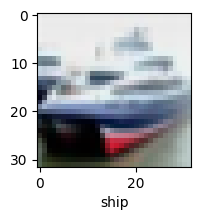

In [50]:
plot_sample(X_test, y_test, 1)

In [51]:
y_pred = cnn.predict(X_test) # This line of code predicts the output labels for the test data X_test using the predict method of the cnn model. The predicted labels are stored in the y_pred variable.
y_pred[:5] # This line of code uses array slicing to print the first five elements of the y_pred array. The purpose of this line is to inspect the first five predicted labels of the test set.

array([[2.1983436e-05, 6.5070075e-05, 4.3068272e-03, 9.3561530e-01,
        7.5356528e-04, 5.0680134e-02, 5.3634536e-03, 4.9198527e-05,
        2.5084680e-03, 6.3596293e-04],
       [6.7171798e-04, 1.1838138e-02, 3.5937671e-07, 1.0532788e-07,
        6.3786905e-09, 2.7402765e-09, 3.3332406e-10, 3.3166947e-10,
        9.8740107e-01, 8.8639637e-05],
       [3.7430055e-02, 4.9987027e-01, 3.2881640e-03, 3.2731779e-02,
        2.4538615e-04, 3.8146807e-03, 2.3387405e-04, 1.3801037e-02,
        8.5130312e-02, 3.2345444e-01],
       [8.8176352e-01, 2.1511996e-04, 2.0141987e-02, 6.3946592e-03,
        1.1008596e-03, 4.3434752e-06, 2.6270674e-04, 1.2684196e-03,
        8.8562928e-02, 2.8543701e-04],
       [2.7656527e-06, 2.2897373e-07, 1.8798100e-02, 2.1005828e-02,
        2.3794603e-01, 5.5062058e-03, 7.1669555e-01, 2.5209485e-05,
        1.3626371e-05, 6.4726651e-06]], dtype=float32)

In [52]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


# This code converts the predicted output probabilities y_pred into class labels. 
# The argmax function of the NumPy library is used to find the index of the maximum probability value for each predicted output. 
# The argmax function returns the index of the maximum value along a specified axis. 
# The code uses a list comprehension to apply the argmax function to each element in the y_pred array. 
# The resulting class labels are stored in the y_classes variable. 
# The second line of this code uses array slicing to print the first five elements of the y_classes array. 
# The purpose of this line is to inspect the first five predicted class labels of the test set.

[3, 8, 1, 0, 6]

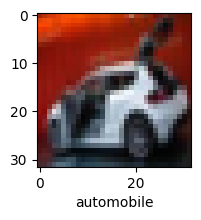

In [62]:
plot_sample(X_test, y_test, 6)

In [63]:
classes[y_classes[6]]

'automobile'

In [64]:
print('Classification Report: \n', classification_report(y_test, y_classes))

# This code prints a classification report based on the performance of the 'cnn' model on the test set. The `classification_report` function from the Scikit-learn library is used to generate the report. 
# The 'classification_report' function takes two arguments: the true labels of the test set (`y_test`) and the predicted labels of the test set (`y_classes`). It computes various performance metrics such as precision, recall, f1-score, and support for each class in the data set, as well as the average values of these metrics across all classes. 
# The 'print' function is used to display the classification report on the console. The output of this code provides a detailed summary of the performance of the `cnn` model on the test set, including metrics such as precision, recall, and f1-score for each class in the data set.

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.67      0.73      1000
           1       0.85      0.78      0.81      1000
           2       0.62      0.55      0.58      1000
           3       0.50      0.53      0.51      1000
           4       0.61      0.70      0.65      1000
           5       0.57      0.66      0.61      1000
           6       0.76      0.76      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.81      0.79      0.80      1000
           9       0.78      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

